<p>
    <img src="https://s3.amazonaws.com/iotanalytics-templates/Logo.png" style="float:left;width:65px">
    <h1 style="float:left;color:#1A5276;padding-left:15px;font-size:20px;">AWS IoT Analytics | Notebook</h1>
</p>


When loading data from IoT Analytics datasets, the client should be initialized first:

In [1]:
%matplotlib inline
import boto3
import sys
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters

client = boto3.client("iotanalytics")
data = client.get_dataset_content(datasetName="project_dataset")

In [2]:
df = pd.read_csv(data["entries"][0]["dataURI"])
df


/home/ec2-user/anaconda3/envs/amazonei_pytorch_latest_p37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,altitude,acz,timestamp,gyz,gyy,gyx,acx,acy,temperature,pressure,occupancy,message,__dt
0,371.821,-16204.0,2023-06-23T05:15:56,-39.0,556.0,-313.0,636.0,-136.0,26.24,96938.0,0.0,NaN,2023-06-23 00:00:00.000
1,371.557,-16148.0,2023-06-23T05:15:57,-42.0,536.0,-323.0,616.0,-100.0,26.24,96941.0,0.0,NaN,2023-06-23 00:00:00.000
2,371.821,-16112.0,2023-06-23T05:15:58,-55.0,547.0,-303.0,612.0,-140.0,26.24,96938.0,0.0,NaN,2023-06-23 00:00:00.000
3,371.557,-16148.0,2023-06-23T05:15:59,-42.0,535.0,-299.0,620.0,-120.0,26.24,96941.0,0.0,NaN,2023-06-23 00:00:00.000
4,371.821,-16168.0,2023-06-23T05:16:00,-35.0,560.0,-306.0,560.0,-148.0,26.24,96938.0,0.0,NaN,2023-06-23 00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130855,380.191,-16164.0,2023-06-22T15:33:06,-30.0,558.0,-325.0,552.0,-124.0,27.42,96839.0,0.0,NaN,2023-06-22 00:00:00.000
130856,380.878,-16168.0,2023-06-22T15:33:07,-27.0,526.0,-316.0,544.0,-196.0,27.42,96835.0,0.0,NaN,2023-06-22 00:00:00.000
130857,380.361,-16140.0,2023-06-22T15:33:08,-56.0,567.0,-293.0,572.0,-156.0,27.42,96838.0,0.0,NaN,2023-06-22 00:00:00.000
130858,380.878,-16184.0,2023-06-22T15:33:09,-31.0,543.0,-334.0,664.0,-172.0,27.42,96833.0,0.0,NaN,2023-06-22 00:00:00.000


In [3]:
df["dt"] = pd.to_datetime(df["timestamp"])
#df = df[df["dt"].dt.day == 21]


In [4]:
# clean up the DataFrame
df = df.drop(columns='__dt')
df = df.sort_values(by='timestamp', ascending=True)
df = df[['dt', 'occupancy', 'temperature', 'pressure', 'altitude', 'acz', 'acx', 'acy', 'gyx', 'gyy', 'gyz', 'timestamp']]
display(df.tail(5))

,dt,occupancy,temperature,pressure,altitude,acz,acx,acy,gyx,gyy,gyz,timestamp
7304,2023-06-23 08:32:15,0.0,25.13,97112.0,356.897,-16100.0,652.0,-108.0,-312.0,548.0,-38.0,2023-06-23T08:32:15
7305,2023-06-23 08:32:16,0.0,25.13,97113.0,356.728,-16092.0,508.0,-92.0,-311.0,528.0,-41.0,2023-06-23T08:32:16
7306,2023-06-23 08:32:17,1.0,25.13,97113.0,356.728,-16200.0,692.0,-80.0,-316.0,543.0,-29.0,2023-06-23T08:32:17
7307,2023-06-23 08:32:18,1.0,25.13,97111.0,356.897,-16136.0,600.0,-152.0,-312.0,527.0,-34.0,2023-06-23T08:32:18
114079,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Filter temperature outliers (>1% & <99%)
#quantile_01 = df['temperature'].quantile(0.01)
#quantile_99 = df['temperature'].quantile(0.99)

#df = df.loc[(df['temperature'] > quantile_01) & (df['temperature'] < quantile_99)]


<AxesSubplot:xlabel='timestamp'>

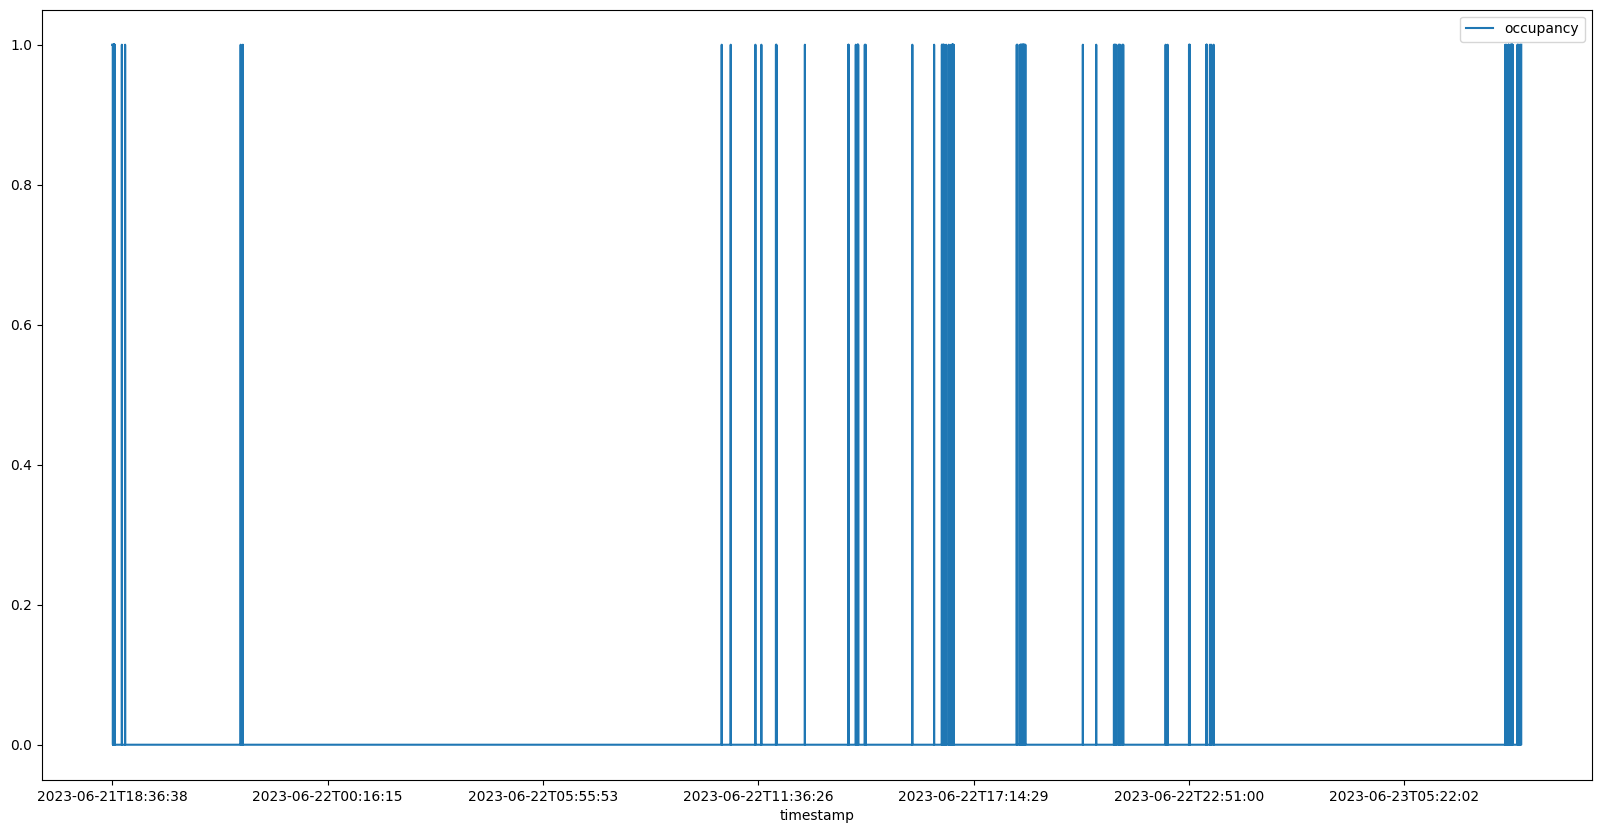

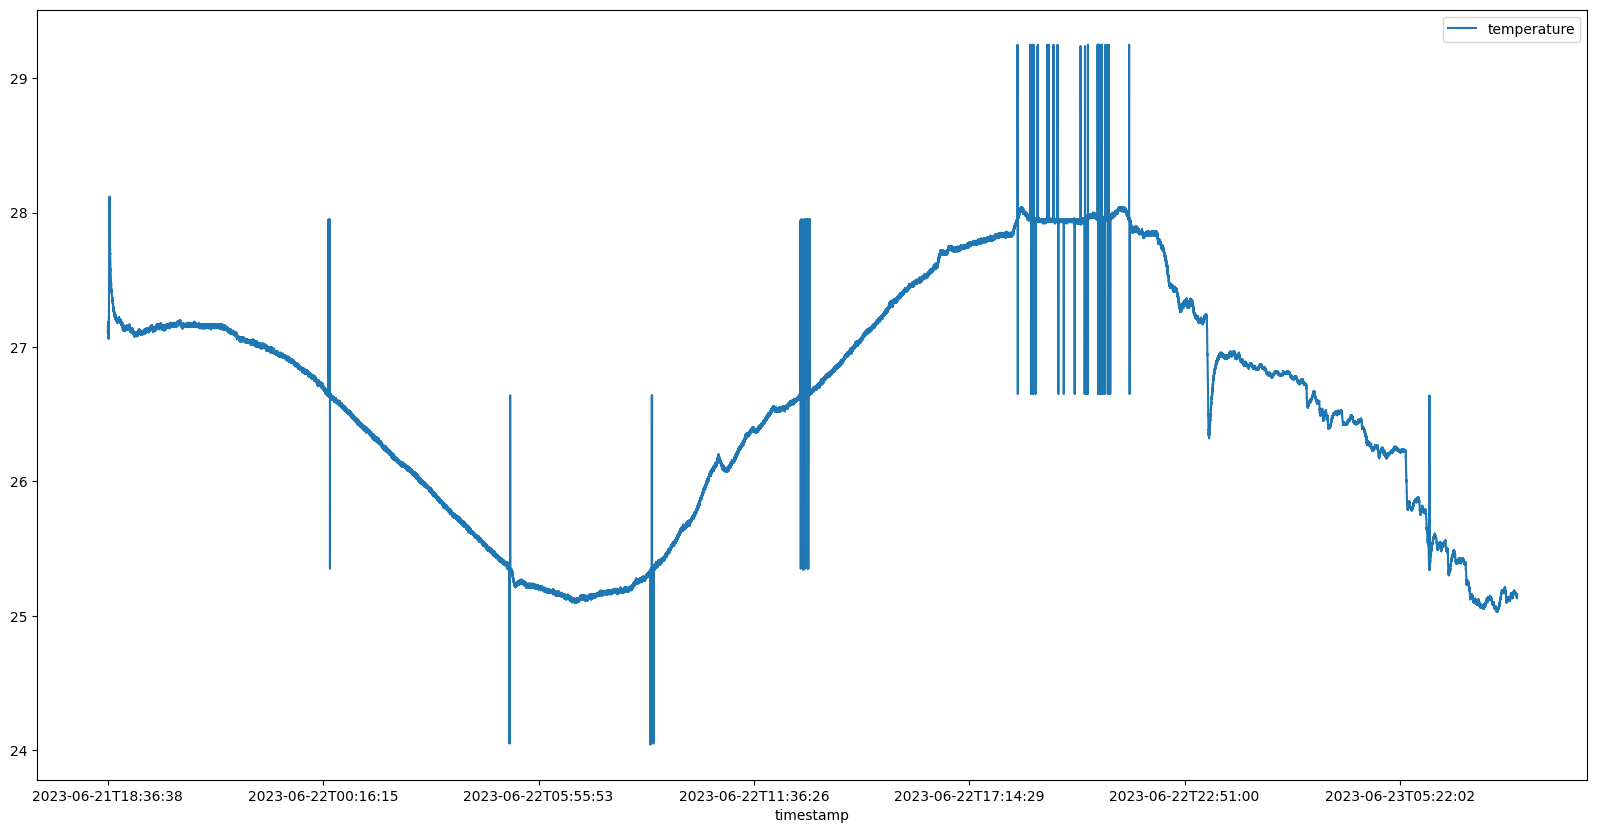

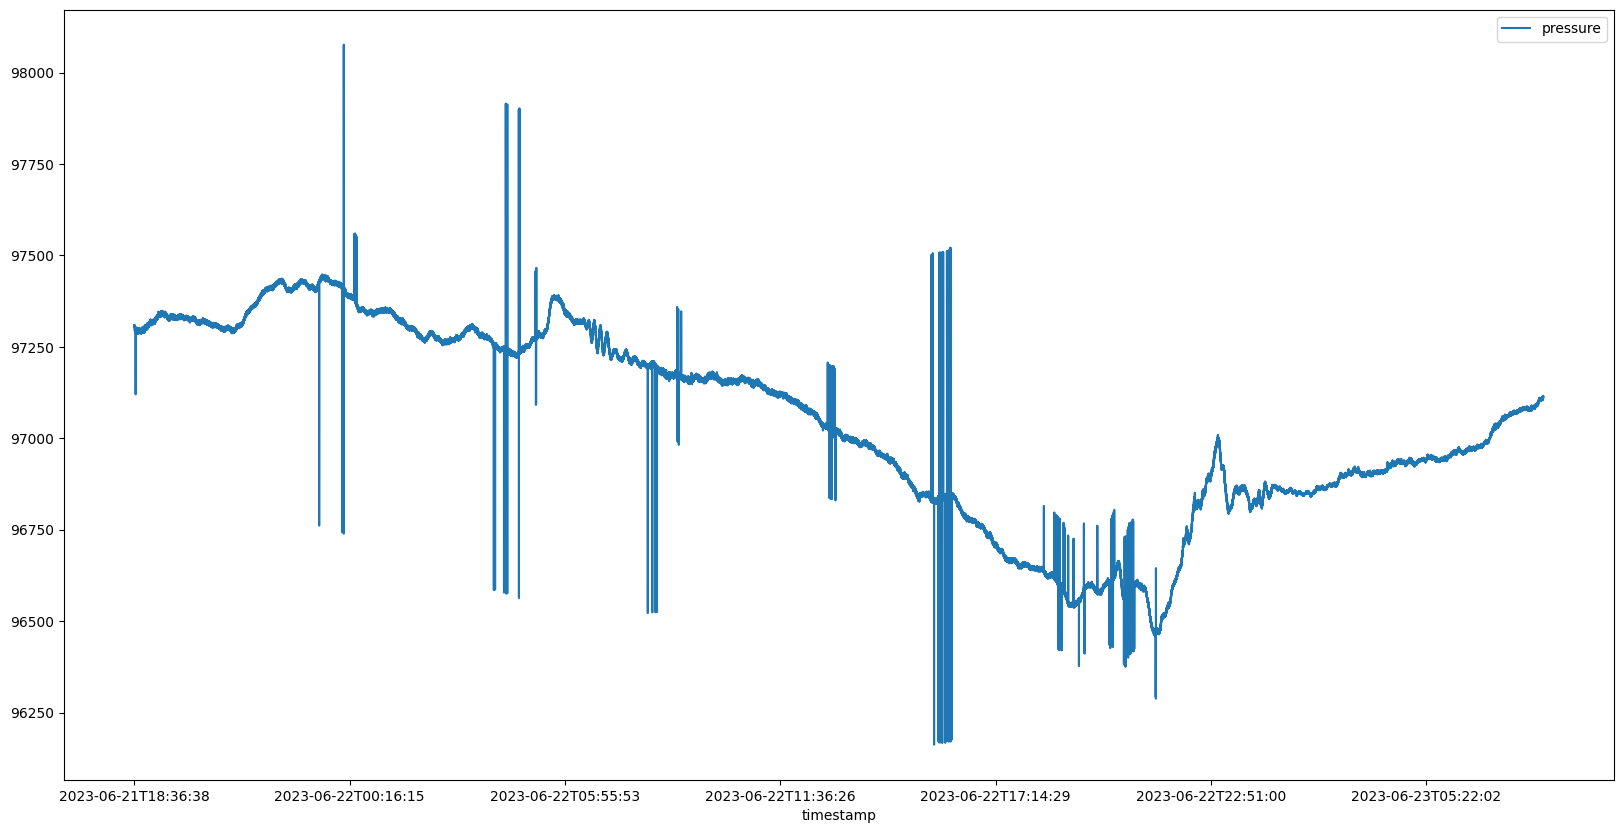

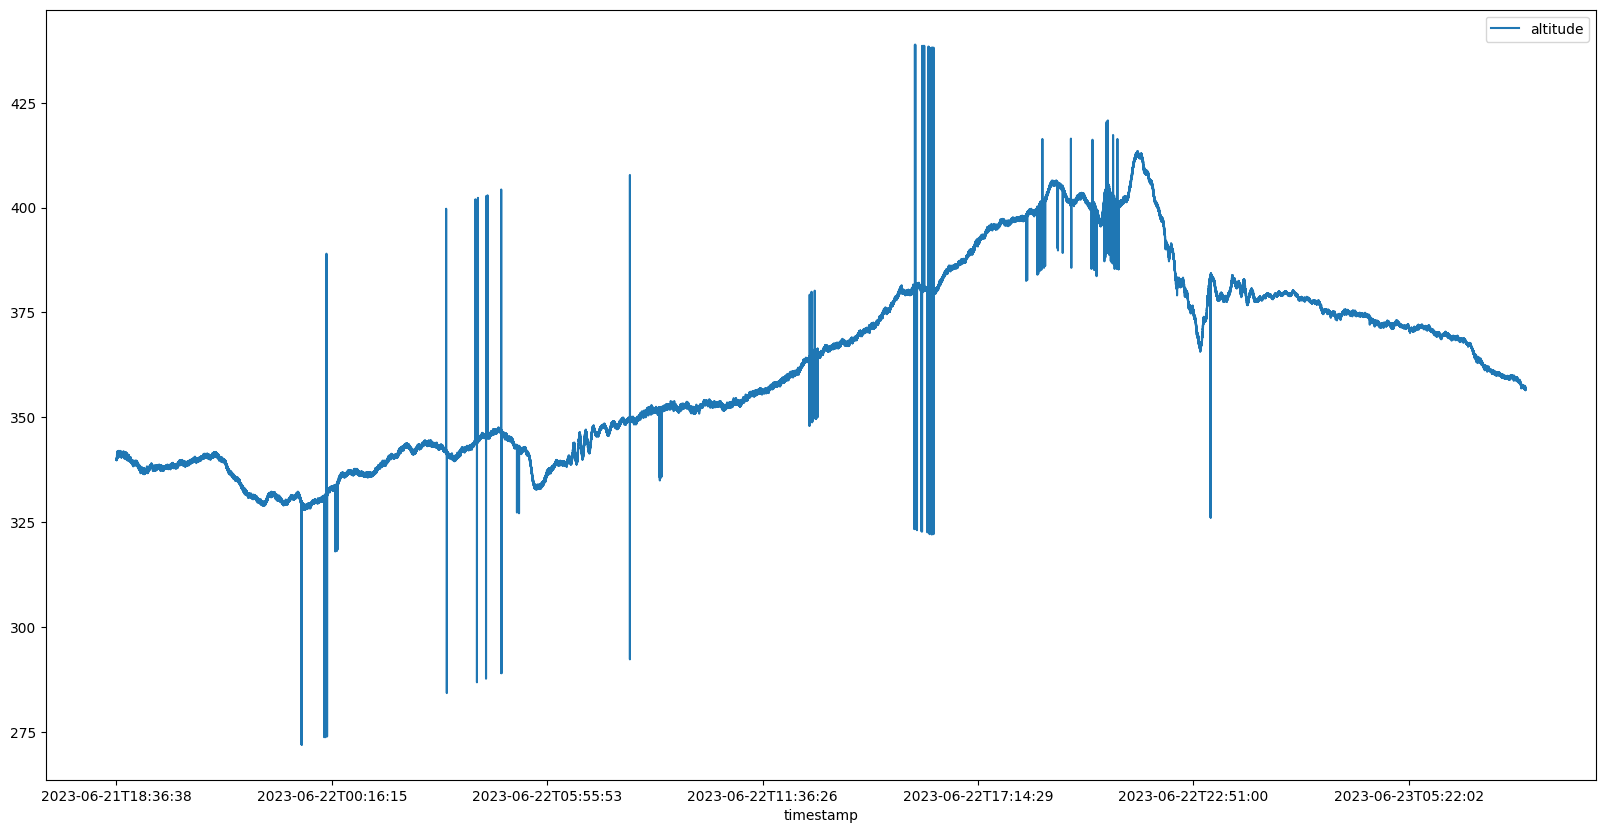

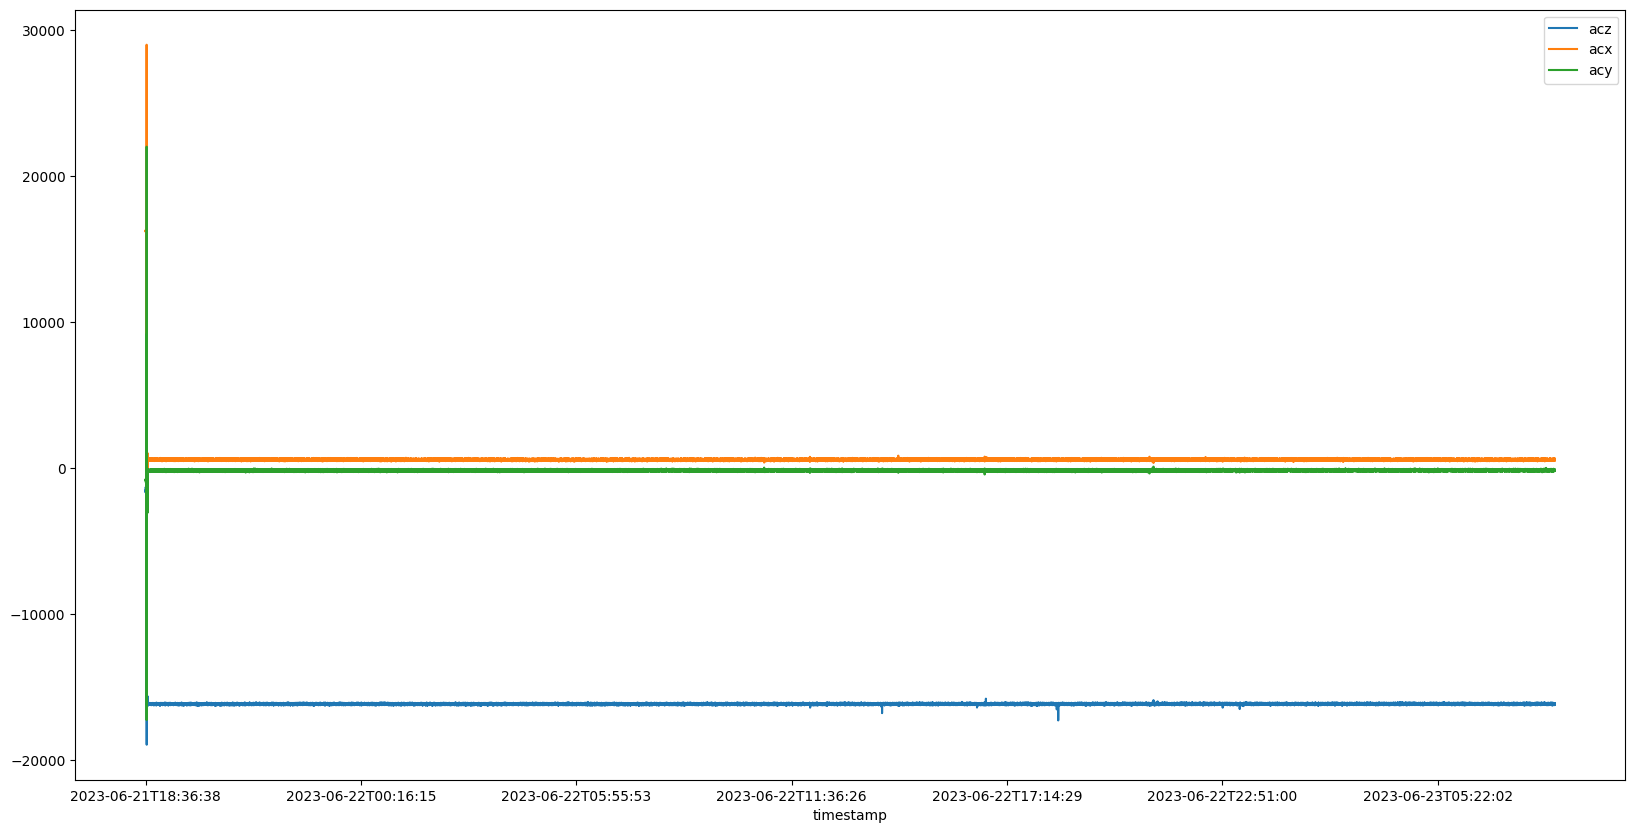

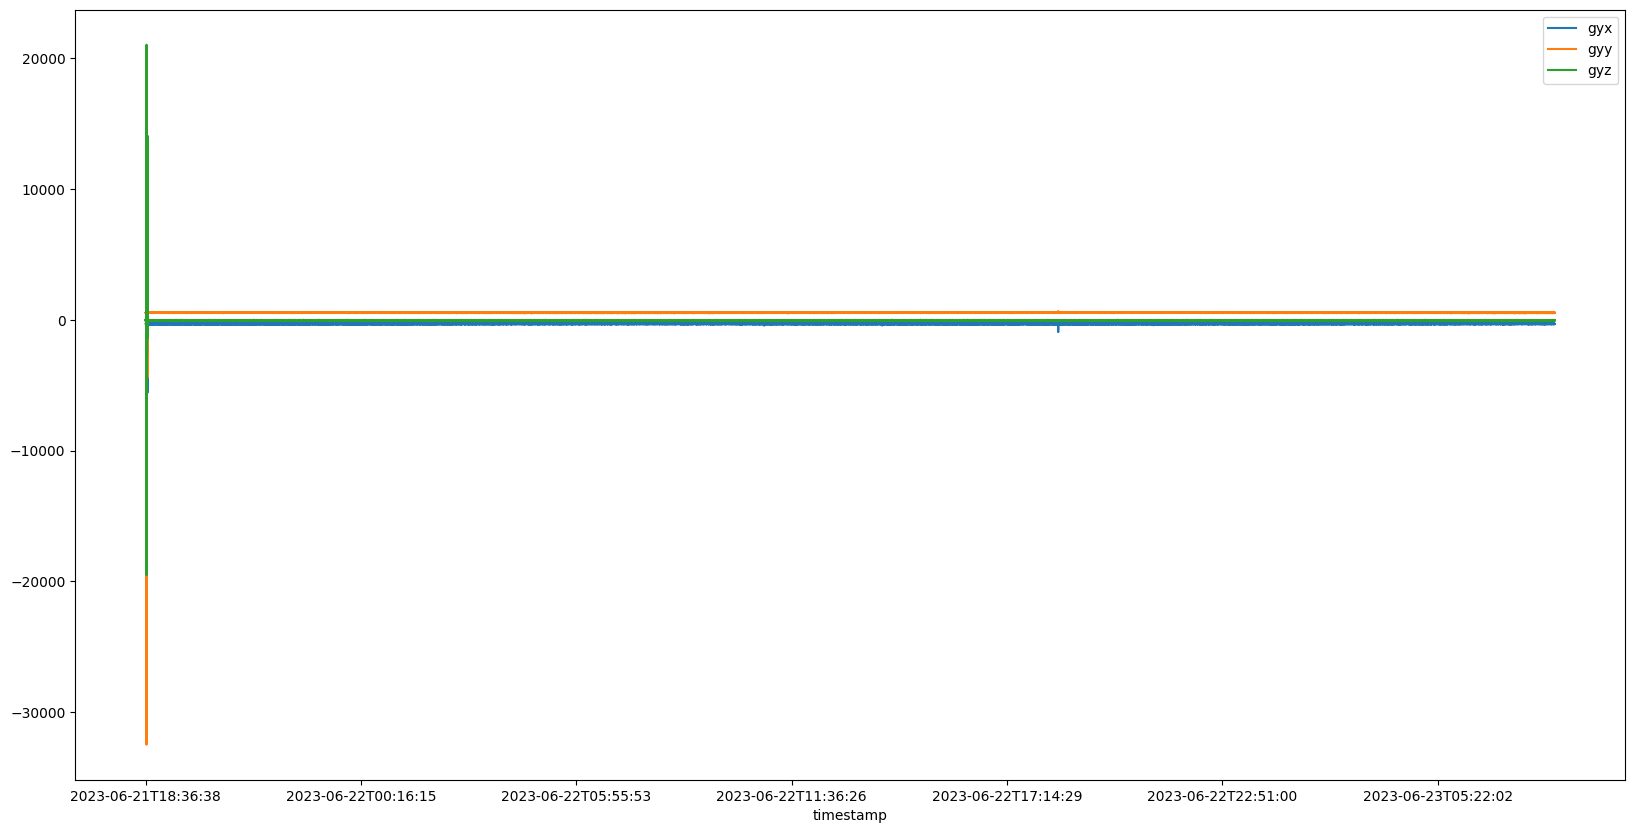

In [6]:
import matplotlib.pyplot as plt

#ax = plt.gca()

df.plot(x="timestamp", y="occupancy", kind="line", figsize=(20, 10))
df.plot(x="timestamp", y="temperature", figsize=(20, 10), kind="line")
df.plot(x="timestamp", y="pressure", figsize=(20, 10), kind="line")
df.plot(x="timestamp", y="altitude", figsize=(20, 10), kind="line")
df.plot(x="timestamp", y=["acz","acx","acy"], figsize=(20, 10), kind="line")
df.plot(x="timestamp", y=["gyx","gyy","gyz"], figsize=(20, 10), kind="line")
#ax.set_xlabel("Date")

<div style="height:60px;"><div style="height:7px;background-color:#20B3CD;width:100%;margin-top:20px;position:relative;"><img src="https://s3.amazonaws.com/iotanalytics-templates/Logo.png" style="height:50px;width:50px;margin-top:-20px;position:absolute;margin-left:42%;"></div></div>